# Sprint4課題 機械学習スクラッチロジスティック回帰

使用するデータを作成

In [1]:
"""
irisデータを読み込むコード
"""

from sklearn.datasets import load_iris
import pandas as pd
from pandas import DataFrame
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = load_iris()
df_X = DataFrame(data=data.data, columns=pd.Index(["sepal_length", "sepal_width", "petal_length", "petal_width"]))
df_y = DataFrame(data=data.target, columns=pd.Index(["Target"]))
df_X =df_X[["sepal_length", "petal_length"]]
df_train= df_X.join(df_y).query("Target == [1, 2]")
X = df_train.drop("Target", axis=1).values
y = df_train[["Target"]].values

(X_train, X_val, y_train, y_val) = train_test_split(X, y, test_size=0.3)
        
#標準化
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
y_train = y_train -1
y_val = y_val -1

## 【問題1】ロジスティック回帰のクラスを作成する

### シグモイド関数
$$
g(z) = \frac{1}{1+e^{−z}}
$$
シグモイド関数を実装しましょう。

In [3]:
#シグモイド関数作成
import numpy as np

def sig(z):
    return 1 / (1+np.exp(-z))

In [4]:
#-10から10の値を入力したときの出力をプロット
import matplotlib.pyplot as plt
x = range(-10, 11, 1)
y = [sig(i) for i in x]

plt.title('sigmoid')
plt.plot(x, y)

### 目的関数

以下の数式で表されるロジスティック回帰の目的関数
J
を実装してください。この数式には正則化項が含まれています。

$$
h_θ(x) = g(θ^T x).\\
g(z) = \frac{1}{1+e^{−z}}.\\
J(\theta)=  \frac{1}{m}  \sum_{i=1}^{m}[−y^{(i)} log(h_θ(x^{(i)})) − (1−y^{(i)}) log(1−h_θ(x^{(i)}))] +
\frac{λ}{2m}\sum_{j=1}^n
θ^2_j.\\
$$

m
 : 入力されるデータの数

m
 : 入力されるデータの数

h
θ
(
)
 : 仮定関数

x
 : 特徴量ベクトル

θ
 : パラメータベクトル

g
(
)
 : シグモイド関数

x
(
i
)
 : i番目のサンプルの特徴量ベクトル

y
(
i
)
 : i番目のサンプルの正解ラベル

θ
j
 : j番目のパラメータ（重み）

λ
 : 正則化パラメータ

In [ ]:
def logstic_hypothesis(X, theta):
    """
    input : m行n列の行列
    return : 数値
    """
    return sig(np.dot(theta.T, X))

In [ ]:
def J_func(X, y, theta):
    nakami = -y*np.log(logstic_hypothesis(X,theta)) - (1-y)*np.log(1-logstic_hypothesis(X,theta))
    J = (1/m)*sum(nakami) + (lam/2*m)*sum(theta**2)

### 最急降下法
最急降下法により学習させてください。バイアス項およびj番目のパラメータの更新には以下の式を使います。

$$
\frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m}  \sum_{i=1}^{m}(h_θ(x^{(i)}) − y^{(i)})x_j^{(i)}  ,j = 0\\
\frac{\partial J(\theta)}{\partial \theta_j} = \biggl(\frac{1}{m}  \sum_{i=1}^{m}(h_θ(x^{(i)}) − y^{(i)})x_j^{(i)} \biggr) + \frac{λ}{m}\theta_j　 ,j\geq 1
$$

i
 : サンプルのインデックス

j
 : 特徴量のインデックス

### 実装

In [6]:
# from utils.logistic import ScratchLogisticRegression
# logistic = ScratchLogisticRegression(lam=0.005)

#importからではなく、pickleで呼び出す
import pickle

with open('model.pickle', 'rb') as fp:
   clf = pickle.load(fp)

In [7]:
clf.fit(X_train, y_train, X_val, y_val)

## 【問題2】学習曲線のプロット

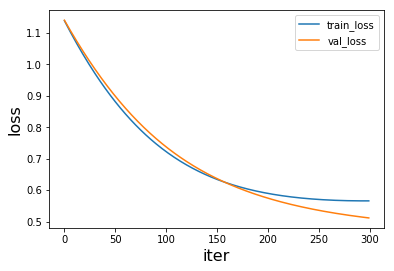

In [8]:
clf.plot()

## 【問題3】指標値の算出

In [9]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

y_predict_proba = clf.predict_proba(X_val)

#AUCを求める
roc_auc_score(y_val, y_predict_proba[:,1])


0.9866071428571429

In [11]:
#accuracyを求める
accuracy_score(y_val, clf.predict(X_val))

0.9

## 【問題4】決定領域の可視化

決定曲線は求めるには  
θ0+θ1＊X1+θ2＊X2=0
から求めることができる。

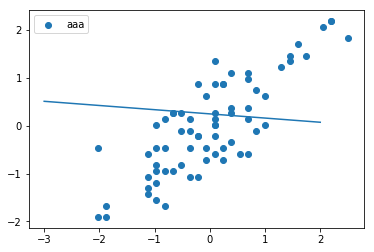

In [12]:
clf.scatter(X_train[:, 0], X_train[:, 1])

## 【問題5】（アドバンス課題）重みの保存

In [ ]:
# import pickle

# with open('model.pickle', mode='wb') as fp:
#    pickle.dump(logistic, fp, protocol=2)

In [ ]:
# with open('model.pickle', 'rb') as fp:
#    clf = pickle.load(fp)

## 【問題6】分類と回帰

異なっている点は、回帰問題は連続値を求めるのに対して、分類問題は離散値を求める点である。